In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
ds=pd.read_csv("tesla.csv")

In [8]:
ds

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,28-01-2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,29-01-2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,30-01-2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,31-01-2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [9]:
ds.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
ds.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,28-01-2020,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,29-01-2020,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,30-01-2020,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,31-01-2020,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,03-02-2020,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [6]:
ds.shape

(2416, 7)

In [9]:
ds.drop('Adj Close',axis=1,inplace=True)

In [10]:
ds.head()

,Date,Open,High,Low,Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900


In [11]:
ds.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
ds.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB


In [14]:
ds.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


In [15]:
print(len(ds))

2416


<Axes: >

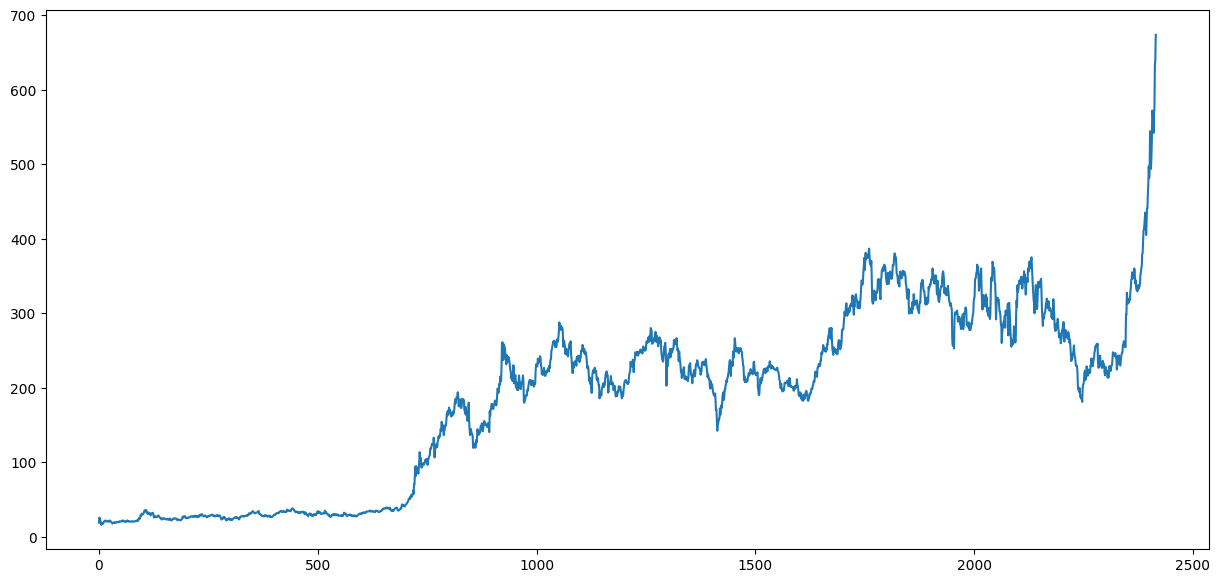

In [18]:
ds['Open'].plot(figsize=(15,7))

In [20]:
X=ds[['Open','High','Low','Volume']]
Y=ds['Close']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

In [23]:
X_train.shape


(1812, 4)

In [24]:
X_test.shape

(604, 4)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=LinearRegression()

In [27]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [28]:
print(regressor.coef_)

[-6.39634305e-01  9.11543017e-01  7.26604894e-01 -1.55475449e-08]


In [29]:
print(regressor.intercept_)

-0.06244869429824007


In [31]:
predicted=regressor.predict(X_test)

In [32]:
print(X_test)

            Open        High         Low    Volume
966   207.080002  214.020004  205.690002   5439900
557    27.900000   28.580000   27.799999   1145200
148    24.879999   24.879999   23.750000   1048400
1917  343.309998  348.619995  314.600006  10314600
1585  200.500000  200.899994  197.050003   2494600
...          ...         ...         ...       ...
1636  214.880005  222.250000  214.419998   5915700
1948  307.339996  307.589996  291.359985   8375200
2348  297.720001  330.000000  296.109985  30006100
1190  198.500000  200.500000  197.470001   2631600
359    32.490002   33.070000   31.629999    591100

[604 rows x 4 columns]


In [33]:
predicted.shape

(604,)

In [34]:
dframe=pd.DataFrame(Y_test,predicted)

In [36]:
dfr=pd.DataFrame({'Actual Price':Y_test,'Predicted Price':predicted})

In [37]:
print(dfr)

      Actual Price  Predicted Price
966     207.729996       211.941303
557      28.280001        28.325464
148      24.010000        23.943206
1917    315.230011       326.556359
1585    200.240005       197.958571
...            ...              ...
1636    219.529999       220.790009
1948    304.179993       295.307237
2348    328.130005       325.003264
1190    199.630005       199.176271
359      31.750000        32.273881

[604 rows x 2 columns]


In [39]:
dfr.head(20)

,Actual Price,Predicted Price
966,207.729996,211.941303
557,28.280001,28.325464
148,24.010000,23.943206
1917,315.230011,326.556359
1585,200.240005,197.958571
985,210.240005,209.816491
215,26.440001,26.548544
390,22.790001,24.115729
1299,224.839996,218.490971
1806,353.179993,350.558563


In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [42]:
regressor.score(X_test,Y_test)

0.9996847995137144

In [43]:
import math

In [45]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,predicted))

Mean Absolute Error: 1.3958905895154048


In [47]:
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,predicted))

Mean Squared Error: 4.421255297344351


In [48]:
print('Root Mean Absolute Error:',math.sqrt(metrics.mean_squared_error(Y_test,predicted)))

Root Mean Absolute Error: 2.1026781249978206


In [49]:
graph=dfr.head(20)

<Axes: >

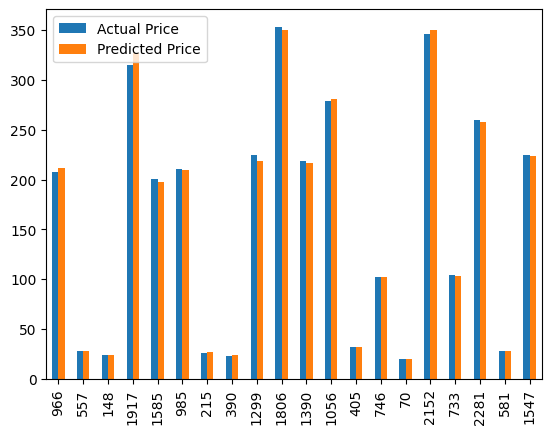

In [50]:
graph.plot(kind='bar')